In [356]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
import re


In [303]:
df = pd.read_csv("data/attacks.csv", encoding="latin1")
df



,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [304]:
df.columns.values

array(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area',
       'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury',
       'Fatal (Y/N)', 'Time', 'Species ', 'Investigator or Source', 'pdf',
       'href formula', 'href', 'Case Number.1', 'Case Number.2',
       'original order', 'Unnamed: 22', 'Unnamed: 23'], dtype=object)

In [305]:
df = df.drop(columns=["Location", "Name", "Age", "Injury", "Investigator or Source", "Time", "Investigator or Source", "pdf", "href formula", "href", "Case Number.1", "Case Number.2", "original order", "Unnamed: 22", "Unnamed: 23"])
df

,Case Number,Date,Year,Type,Country,Area,Activity,Sex,Fatal (Y/N),Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,Paddling,F,N,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,Standing,F,N,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,Surfing,M,N,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Surfing,M,N,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,Free diving,M,N,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [306]:
df = df.drop(columns=["Country", "Area"])
df 

,Case Number,Date,Year,Type,Activity,Sex,Fatal (Y/N),Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,Paddling,F,N,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,Standing,F,N,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,Surfing,M,N,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,Surfing,M,N,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,Free diving,M,N,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [307]:
df2 = df.drop(df.columns[[5, -1]],axis = 1)
df2

,Case Number,Date,Year,Type,Activity,Fatal (Y/N)
0,2018.06.25,25-Jun-2018,2018.0,Boating,Paddling,N
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,Standing,N
2,2018.06.09,09-Jun-2018,2018.0,Invalid,Surfing,N
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,Surfing,N
4,2018.06.04,04-Jun-2018,2018.0,Provoked,Free diving,N
...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN


In [308]:
df2 = df2.dropna(how ="all")

In [309]:
df2 

,Case Number,Date,Year,Type,Activity,Fatal (Y/N)
0,2018.06.25,25-Jun-2018,2018.0,Boating,Paddling,N
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,Standing,N
2,2018.06.09,09-Jun-2018,2018.0,Invalid,Surfing,N
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,Surfing,N
4,2018.06.04,04-Jun-2018,2018.0,Provoked,Free diving,N
...,...,...,...,...,...,...
8698,0,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN
8701,0,NaN,NaN,NaN,NaN,NaN


In [310]:
df2 = df2[df2["Date"].str.contains("NaN") == False]
df2


,Case Number,Date,Year,Type,Activity,Fatal (Y/N)
0,2018.06.25,25-Jun-2018,2018.0,Boating,Paddling,N
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,Standing,N
2,2018.06.09,09-Jun-2018,2018.0,Invalid,Surfing,N
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,Surfing,N
4,2018.06.04,04-Jun-2018,2018.0,Provoked,Free diving,N
...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,Diving,Y
6298,ND.0004,Before 1903,0.0,Unprovoked,Pearl diving,Y
6299,ND.0003,1900-1905,0.0,Unprovoked,Swimming,Y
6300,ND.0002,1883-1889,0.0,Unprovoked,NaN,Y


In [311]:
df2 = df2[df2["Fatal (Y/N)"].str.contains("NaN") == False]
df2

,Case Number,Date,Year,Type,Activity,Fatal (Y/N)
0,2018.06.25,25-Jun-2018,2018.0,Boating,Paddling,N
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,Standing,N
2,2018.06.09,09-Jun-2018,2018.0,Invalid,Surfing,N
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,Surfing,N
4,2018.06.04,04-Jun-2018,2018.0,Provoked,Free diving,N
...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,Diving,Y
6298,ND.0004,Before 1903,0.0,Unprovoked,Pearl diving,Y
6299,ND.0003,1900-1905,0.0,Unprovoked,Swimming,Y
6300,ND.0002,1883-1889,0.0,Unprovoked,NaN,Y


In [312]:
df2 = df2[df2["Activity"].str.contains("NaN") == False]
df2

,Case Number,Date,Year,Type,Activity,Fatal (Y/N)
0,2018.06.25,25-Jun-2018,2018.0,Boating,Paddling,N
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,Standing,N
2,2018.06.09,09-Jun-2018,2018.0,Invalid,Surfing,N
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,Surfing,N
4,2018.06.04,04-Jun-2018,2018.0,Provoked,Free diving,N
...,...,...,...,...,...,...
6296,ND.0006,Before 1906,0.0,Unprovoked,Swimming,Y
6297,ND.0005,Before 1903,0.0,Unprovoked,Diving,Y
6298,ND.0004,Before 1903,0.0,Unprovoked,Pearl diving,Y
6299,ND.0003,1900-1905,0.0,Unprovoked,Swimming,Y


In [313]:
df2 = df2[df2["Type"].str.contains("Invalid") == False]
df2

,Case Number,Date,Year,Type,Activity,Fatal (Y/N)
0,2018.06.25,25-Jun-2018,2018.0,Boating,Paddling,N
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,Standing,N
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,Surfing,N
4,2018.06.04,04-Jun-2018,2018.0,Provoked,Free diving,N
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,Kite surfing,N
...,...,...,...,...,...,...
6296,ND.0006,Before 1906,0.0,Unprovoked,Swimming,Y
6297,ND.0005,Before 1903,0.0,Unprovoked,Diving,Y
6298,ND.0004,Before 1903,0.0,Unprovoked,Pearl diving,Y
6299,ND.0003,1900-1905,0.0,Unprovoked,Swimming,Y


In [314]:
df2 = df2[df2["Activity"].str.contains("Swimming") == False]
df2

,Case Number,Date,Year,Type,Activity,Fatal (Y/N)
0,2018.06.25,25-Jun-2018,2018.0,Boating,Paddling,N
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,Standing,N
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,Surfing,N
4,2018.06.04,04-Jun-2018,2018.0,Provoked,Free diving,N
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,Kite surfing,N
...,...,...,...,...,...,...
6293,ND.0009,Before 1906,0.0,Unprovoked,Fishing,Y
6294,ND.0008,Before 1906,0.0,Unprovoked,Fishing,Y
6295,ND.0007,Before 1906,0.0,Unprovoked,Fishing,Y
6297,ND.0005,Before 1903,0.0,Unprovoked,Diving,Y


In [315]:
df2= df2.sort_values(by='Case Number', ascending=False)
df2

,Case Number,Date,Year,Type,Activity,Fatal (Y/N)
6209,ND.0110,"No date, late 1960s",0.0,Unprovoked,Spearfishing,Y
6214,ND.0104,1950s,0.0,Unprovoked,Helmet diving,N
6215,ND.0102,"No date, Before 1963",0.0,Unprovoked,Pearl diving,Y
6216,ND.0100,2003?,0.0,Unprovoked,Spearfishing,N
6217,ND.0097,No date,0.0,Unprovoked,Kitesurfing,N
...,...,...,...,...,...,...
6180,0000.0725,Ca. 725 B.C.,0.0,Sea Disaster,Shipwreck,Y
6179,0000.0493,493 B.C.,0.0,Sea Disaster,Shipwrecked Persian Fleet,Y
6178,0000.0336,Ca. 336.B.C..,0.0,Unprovoked,Washing his pig in preparation for a religious...,Y
6177,0000.0214,Ca. 214 B.C.,0.0,Unprovoked,Ascending from a dive,Y


In [316]:
df2.sample(10)

,Case Number,Date,Year,Type,Activity,Fatal (Y/N)
4814,1938.07.12,12-Jul-1938,1938.0,Unprovoked,"Hardhat diving from Japanese pearling lugger, ...",Y
4250,1956.06.28,28-Jun-1956,1956.0,Unprovoked,"Line fishing from Lakotoi, saw shoal of fish, ...",N
1812,2002.11.11,11-Nov-2002,2002.0,Unprovoked,Surfing,N
1139,2009.04.06.a,06-Apr-2009,2009.0,Unprovoked,Spearfishing,N
5101,1928.07.11,11-Jul-1928,1928.0,Unprovoked,Pearl diving,N
4231,1956.09.13,13-Sep-1956,1956.0,Unprovoked,Climbing back on ship,Y
3127,1978.02.28,28-Feb-1978,1978.0,Unprovoked,Fishing for mackerel,N
752,2012.08.15,15-Aug-2012,2012.0,Unprovoked,Wading or swimming,N
5797,1882.05.14,14-May-1882,1882.0,Unprovoked,Fell overboard,N
1561,2005.08.12,12-Aug-2005,2005.0,Unprovoked,Surfing,N


In [317]:
df3 = df2.drop(df2.columns[0], axis=1)
df3

,Date,Year,Type,Activity,Fatal (Y/N)
6209,"No date, late 1960s",0.0,Unprovoked,Spearfishing,Y
6214,1950s,0.0,Unprovoked,Helmet diving,N
6215,"No date, Before 1963",0.0,Unprovoked,Pearl diving,Y
6216,2003?,0.0,Unprovoked,Spearfishing,N
6217,No date,0.0,Unprovoked,Kitesurfing,N
...,...,...,...,...,...
6180,Ca. 725 B.C.,0.0,Sea Disaster,Shipwreck,Y
6179,493 B.C.,0.0,Sea Disaster,Shipwrecked Persian Fleet,Y
6178,Ca. 336.B.C..,0.0,Unprovoked,Washing his pig in preparation for a religious...,Y
6177,Ca. 214 B.C.,0.0,Unprovoked,Ascending from a dive,Y


In [318]:
df3["Date"] = pd.to_datetime(df3["Date"], errors = "coerce")

df3.sample(10)

C:\Users\ramse\AppData\Local\Temp\ipykernel_33180\3574081001.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df3["Date"] = pd.to_datetime(df3["Date"], errors = "coerce")


,Date,Year,Type,Activity,Fatal (Y/N)
1648,2004-08-01,2004.0,Boat,Fishing,N
3167,1976-10-18,1976.0,Unprovoked,Surfing,N
2252,1997-05-31,1997.0,Unprovoked,Spearfishing,N
152,2017-04-22,2017.0,Unprovoked,Snorkeling,N
1822,2002-09-29,2002.0,Unprovoked,Surfing,N
6264,NaT,0.0,Unprovoked,"Standing, washing rear wheels of his ambulance...",Y
1298,NaT,2008.0,Provoked,Fishing for snapper,N
961,NaT,2010.0,Unprovoked,Surfing,N
349,2015-10-08,2015.0,Unprovoked,Fishing,N
2785,1987-03-30,1987.0,Unprovoked,Surfing,N


In [319]:
df3.dropna(subset=["Date"], inplace =True)
df3

,Date,Year,Type,Activity,Fatal (Y/N)
0,2018-06-25,2018.0,Boating,Paddling,N
1,2018-06-18,2018.0,Unprovoked,Standing,N
3,2018-06-08,2018.0,Unprovoked,Surfing,N
4,2018-06-04,2018.0,Provoked,Free diving,N
5,2018-06-03,2018.0,Unprovoked,Kite surfing,N
...,...,...,...,...,...
6134,1792-09-12,1792.0,Provoked,Fishing,Y
6136,1788-05-10,1788.0,Boat,Fishing,N
6143,1779-01-01,1779.0,Unprovoked,Surfing,Y
6149,1758-01-01,1758.0,Unprovoked,Fell overboard from a frigate & was swallowed ...,N


In [320]:
df3["Year"] = df3["Date"].dt.year
df3

,Date,Year,Type,Activity,Fatal (Y/N)
0,2018-06-25,2018,Boating,Paddling,N
1,2018-06-18,2018,Unprovoked,Standing,N
3,2018-06-08,2018,Unprovoked,Surfing,N
4,2018-06-04,2018,Provoked,Free diving,N
5,2018-06-03,2018,Unprovoked,Kite surfing,N
...,...,...,...,...,...
6134,1792-09-12,1792,Provoked,Fishing,Y
6136,1788-05-10,1788,Boat,Fishing,N
6143,1779-01-01,1779,Unprovoked,Surfing,Y
6149,1758-01-01,1758,Unprovoked,Fell overboard from a frigate & was swallowed ...,N


In [321]:
df3 = df3.dropna(subset=["Year"])
df3.sample(10)

,Date,Year,Type,Activity,Fatal (Y/N)
5735,1888-01-01,1888,Unprovoked,Sponge diving,N
905,2008-06-26,2008,Unprovoked,Playing in the surf,N
1413,2006-12-11,2006,Unprovoked,Surfing,N
2524,1992-11-11,1992,Unprovoked,Scuba diving (submerged),N
5904,1871-08-01,1871,Provoked,Shark fishing,N
1884,2002-01-30,2002,Unprovoked,Surfing,N
4913,1935-03-30,1935,Unprovoked,Diving from dinghy for trochus shell,N
2826,1986-02-17,1986,Unprovoked,Surfing,N
2573,1991-12-04,1991,Unprovoked,Hookah diving for sea urchins,N
1681,2004-04-05,2004,Unprovoked,Surfing,N


In [322]:
df3 = df3.rename(columns={"Fatal (Y/N)" : "Fatal"})
df3 

,Date,Year,Type,Activity,Fatal
0,2018-06-25,2018,Boating,Paddling,N
1,2018-06-18,2018,Unprovoked,Standing,N
3,2018-06-08,2018,Unprovoked,Surfing,N
4,2018-06-04,2018,Provoked,Free diving,N
5,2018-06-03,2018,Unprovoked,Kite surfing,N
...,...,...,...,...,...
6134,1792-09-12,1792,Provoked,Fishing,Y
6136,1788-05-10,1788,Boat,Fishing,N
6143,1779-01-01,1779,Unprovoked,Surfing,Y
6149,1758-01-01,1758,Unprovoked,Fell overboard from a frigate & was swallowed ...,N


In [323]:
mask_snorkling_diving = df3["Activity"].str.contains("snor|diving", case=False, na=False)
df3.loc[mask_snorkling_diving, "Category"]= "Diving"
df3 = df3.dropna(subset=["Category"])
df3

,Date,Year,Type,Activity,Fatal,Category
4,2018-06-04,2018,Provoked,Free diving,N,Diving
18,2018-04-28,2018,Unprovoked,Scuba diving,N,Diving
39,2018-02-24,2018,Unprovoked,Scuba Diving,N,Diving
45,2018-02-03,2018,Unprovoked,Snorkeling,N,Diving
49,2018-01-14,2018,Unprovoked,Diving,N,Diving
...,...,...,...,...,...,...
5869,1876-01-01,1876,Unprovoked,Sponge diving,Y,Diving
5871,1876-01-01,1876,Unprovoked,Pearl diving,N,Diving
6007,1853-09-28,1853,Unprovoked,Commercial Salvage Diving,N,Diving
6026,1851-01-01,1851,Unprovoked,Hard hat diving,N,Diving


In [324]:
condition1 = df3[df3["Type"].str.contains("Provoked") == True]
condition1

,Date,Year,Type,Activity,Fatal,Category
4,2018-06-04,2018,Provoked,Free diving,N,Diving
811,2012-03-06,2012,Provoked,"Diving, feeding sharks",N,Diving
849,2011-10-29,2011,Provoked,Diving,N,Diving
968,2010-11-19,2010,Provoked,Snorkeling,N,Diving
1068,2009-12-05,2009,Provoked,Diving,N,Diving
1083,2009-10-17,2009,Provoked,Diving,N,Diving
1194,2008-10-22,2008,Provoked,Scuba diving,N,Diving
1342,2007-08-22,2007,Provoked,Diving,N,Diving
1360,2007-07-18,2007,Provoked,Scuba diving,N,Diving
1484,2006-05-02,2006,Provoked,Snorkeling,N,Diving


In [325]:
condition2 = df3[df3["Type"].str.contains("Unprovoked") == True]
condition2

,Date,Year,Type,Activity,Fatal,Category
18,2018-04-28,2018,Unprovoked,Scuba diving,N,Diving
39,2018-02-24,2018,Unprovoked,Scuba Diving,N,Diving
45,2018-02-03,2018,Unprovoked,Snorkeling,N,Diving
49,2018-01-14,2018,Unprovoked,Diving,N,Diving
50,2018-01-13,2018,Unprovoked,Free diving,N,Diving
...,...,...,...,...,...,...
5869,1876-01-01,1876,Unprovoked,Sponge diving,Y,Diving
5871,1876-01-01,1876,Unprovoked,Pearl diving,N,Diving
6007,1853-09-28,1853,Unprovoked,Commercial Salvage Diving,N,Diving
6026,1851-01-01,1851,Unprovoked,Hard hat diving,N,Diving


In [326]:
df3.dtypes

Date        datetime64[ns]
Year                 int32
Type                object
Activity            object
Fatal               object
Category            object
dtype: object

In [327]:
df3["Fatal"].replace([' N'], 'N', inplace=True)
df3["Fatal"].replace(['y'], 'Y', inplace=True)
filter_y_n= ["Y", "N"]
cleaning_y_n = df3["Fatal"].isin(filter_y_n)
df3= df3.loc[cleaning_y_n]
df3["Fatal"].value_counts()
df3

C:\Users\ramse\AppData\Local\Temp\ipykernel_33180\1991928597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Fatal"].replace([' N'], 'N', inplace=True)
C:\Users\ramse\AppData\Local\Temp\ipykernel_33180\1991928597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Fatal"].replace(['y'], 'Y', inplace=True)


,Date,Year,Type,Activity,Fatal,Category
4,2018-06-04,2018,Provoked,Free diving,N,Diving
18,2018-04-28,2018,Unprovoked,Scuba diving,N,Diving
39,2018-02-24,2018,Unprovoked,Scuba Diving,N,Diving
45,2018-02-03,2018,Unprovoked,Snorkeling,N,Diving
49,2018-01-14,2018,Unprovoked,Diving,N,Diving
...,...,...,...,...,...,...
5869,1876-01-01,1876,Unprovoked,Sponge diving,Y,Diving
5871,1876-01-01,1876,Unprovoked,Pearl diving,N,Diving
6007,1853-09-28,1853,Unprovoked,Commercial Salvage Diving,N,Diving
6026,1851-01-01,1851,Unprovoked,Hard hat diving,N,Diving


In [328]:
df3 = df3.reset_index()
df3

,index,Date,Year,Type,Activity,Fatal,Category
0,4,2018-06-04,2018,Provoked,Free diving,N,Diving
1,18,2018-04-28,2018,Unprovoked,Scuba diving,N,Diving
2,39,2018-02-24,2018,Unprovoked,Scuba Diving,N,Diving
3,45,2018-02-03,2018,Unprovoked,Snorkeling,N,Diving
4,49,2018-01-14,2018,Unprovoked,Diving,N,Diving
...,...,...,...,...,...,...,...
495,5869,1876-01-01,1876,Unprovoked,Sponge diving,Y,Diving
496,5871,1876-01-01,1876,Unprovoked,Pearl diving,N,Diving
497,6007,1853-09-28,1853,Unprovoked,Commercial Salvage Diving,N,Diving
498,6026,1851-01-01,1851,Unprovoked,Hard hat diving,N,Diving


In [335]:
condition3 = df3.Year >= 2003
condition4 = df3.Year <= 2016
condition5 = df3.Year >= 1993
condition6 = df3.Year <= 2003
condition7 = df3[df3["Fatal"].str.contains("Y") == True]
condition8 = df3[df3["Fatal"].str.contains("N") == True]

In [336]:
total_attacks = df3[(df3['Year'] >= 1993) & (df3['Year'] <= 2016)]
total_attacks = total_attacks.reset_index()
total_attacks.shape
total_attacks

,level_0,index,Date,Year,Type,Activity,Fatal,Category
0,18,191,2016-12-24,2016,Unprovoked,Snorkeling,N,Diving
1,19,193,2016-12-14,2016,Unprovoked,Free diving,N,Diving
2,20,205,2016-10-14,2016,Unprovoked,Snorkeling,N,Diving
3,21,231,2016-08-07,2016,Unprovoked,Snorkeling,N,Diving
4,22,257,2016-06-24,2016,Unprovoked,Scuba Diving,N,Diving
...,...,...,...,...,...,...,...,...
182,200,2491,1993-06-11,1993,Unprovoked,Scuba diving,Y,Diving
183,201,2493,1993-06-09,1993,Unprovoked,Scuba diving,Y,Diving
184,202,2494,1993-06-05,1993,Unprovoked,Scuba diving at seal colony,Y,Diving
185,203,2504,1993-03-12,1993,Unprovoked,Free diving & spearfishing (ascending),N,Diving


In [337]:
after_finding_nemo = df3[condition3 & condition4]
after_finding_nemo.shape
after_finding_nemo

,index,Date,Year,Type,Activity,Fatal,Category
18,191,2016-12-24,2016,Unprovoked,Snorkeling,N,Diving
19,193,2016-12-14,2016,Unprovoked,Free diving,N,Diving
20,205,2016-10-14,2016,Unprovoked,Snorkeling,N,Diving
21,231,2016-08-07,2016,Unprovoked,Snorkeling,N,Diving
22,257,2016-06-24,2016,Unprovoked,Scuba Diving,N,Diving
...,...,...,...,...,...,...,...
143,1699,2004-01-25,2004,Unprovoked,Scuba diving,N,Diving
144,1705,2004-01-12,2004,Unprovoked,Diving,N,Diving
145,1721,2003-11-06,2003,Unprovoked,Snorkeling,N,Diving
146,1762,2003-07-01,2003,Unprovoked,Snorkeling,N,Diving


In [338]:
before_finding_nemo = df3[condition5 & condition6]
before_finding_nemo.shape
before_finding_nemo

,index,Date,Year,Type,Activity,Fatal,Category
145,1721,2003-11-06,2003,Unprovoked,Snorkeling,N,Diving
146,1762,2003-07-01,2003,Unprovoked,Snorkeling,N,Diving
147,1794,2003-02-27,2003,Unprovoked,Scuba diving,N,Diving
148,1802,2002-12-29,2002,Unprovoked,Snorkeling,N,Diving
149,1803,2002-12-24,2002,Unprovoked,Snorkeling,N,Diving
150,1804,2002-12-21,2002,Unprovoked,Scuba diving,N,Diving
151,1808,2002-11-28,2002,Unprovoked,Scuba diving,N,Diving
152,1811,2002-11-14,2002,Unprovoked,Snorkeling,N,Diving
153,1855,2002-06-03,2002,Unprovoked,Snorkeling (filming the sardine run),N,Diving
154,1865,2002-04-30,2002,Unprovoked,Scallop diving (using surface-supplied air & a...,Y,Diving


In [339]:
condition8

,index,Date,Year,Type,Activity,Fatal,Category
0,4,2018-06-04,2018,Provoked,Free diving,N,Diving
1,18,2018-04-28,2018,Unprovoked,Scuba diving,N,Diving
2,39,2018-02-24,2018,Unprovoked,Scuba Diving,N,Diving
3,45,2018-02-03,2018,Unprovoked,Snorkeling,N,Diving
4,49,2018-01-14,2018,Unprovoked,Diving,N,Diving
...,...,...,...,...,...,...,...
493,5760,1886-01-28,1886,Unprovoked,Diving off jetty,N,Diving
494,5761,1886-01-26,1886,Unprovoked,Diving alongsidethe steamship Ranelagh,N,Diving
496,5871,1876-01-01,1876,Unprovoked,Pearl diving,N,Diving
497,6007,1853-09-28,1853,Unprovoked,Commercial Salvage Diving,N,Diving


In [340]:
condition7

,index,Date,Year,Type,Activity,Fatal,Category
8,58,2017-11-30,2017,Unprovoked,Scuba diving,Y,Diving
13,144,2017-05-05,2017,Unprovoked,Snorkeling,Y,Diving
23,267,2016-06-05,2016,Unprovoked,Diving,Y,Diving
25,299,2016-03-10,2016,Unprovoked,Diving for beche-de-mer,Y,Diving
29,385,2015-07-25,2015,Unprovoked,Scallop diving on hookah,Y,Diving
...,...,...,...,...,...,...,...
480,5287,1917-07-18,1917,Unprovoked,Diving,Y,Diving
489,5479,1906-04-14,1906,Unprovoked,Diving for beche-de-mer,Y,Diving
491,5685,1892-01-01,1892,Provoked,Dress diving,Y,Diving
495,5869,1876-01-01,1876,Unprovoked,Sponge diving,Y,Diving


In [275]:
before_finding_nemo = before_finding_nemo.reset_index()
before_finding_nemo = before_finding_nemo.drop(columns=["level_0", "index"])
before_finding_nemo

,Date,Year,Type,Activity,Fatal,Category
0,2002-12-29,2002,Unprovoked,Snorkeling,N,Diving
1,2002-12-24,2002,Unprovoked,Snorkeling,N,Diving
2,2002-12-21,2002,Unprovoked,Scuba diving,N,Diving
3,2002-11-28,2002,Unprovoked,Scuba diving,N,Diving
4,2002-11-14,2002,Unprovoked,Snorkeling,N,Diving
5,2002-06-03,2002,Unprovoked,Snorkeling (filming the sardine run),N,Diving
6,2002-04-30,2002,Unprovoked,Scallop diving (using surface-supplied air & a...,Y,Diving
7,2002-03-15,2002,Unprovoked,Snorkeling,N,Diving
8,2002-01-01,2002,Unprovoked,Snorkeling,N,Diving
9,2001-10-02,2001,Unprovoked,Snorkeling,N,Diving


In [341]:
before_finding_nemo['Fatal'].str.contains('Y').sum()

17

In [343]:
after_finding_nemo = after_finding_nemo.reset_index()
after_finding_nemo = after_finding_nemo.drop(columns=["index"])
after_finding_nemo

,level_0,Date,Year,Type,Activity,Fatal,Category
0,18,2016-12-24,2016,Unprovoked,Snorkeling,N,Diving
1,19,2016-12-14,2016,Unprovoked,Free diving,N,Diving
2,20,2016-10-14,2016,Unprovoked,Snorkeling,N,Diving
3,21,2016-08-07,2016,Unprovoked,Snorkeling,N,Diving
4,22,2016-06-24,2016,Unprovoked,Scuba Diving,N,Diving
...,...,...,...,...,...,...,...
125,143,2004-01-25,2004,Unprovoked,Scuba diving,N,Diving
126,144,2004-01-12,2004,Unprovoked,Diving,N,Diving
127,145,2003-11-06,2003,Unprovoked,Snorkeling,N,Diving
128,146,2003-07-01,2003,Unprovoked,Snorkeling,N,Diving


<Axes: title={'center': 'attacks before finding Nemo'}, xlabel='Year', ylabel='count'>

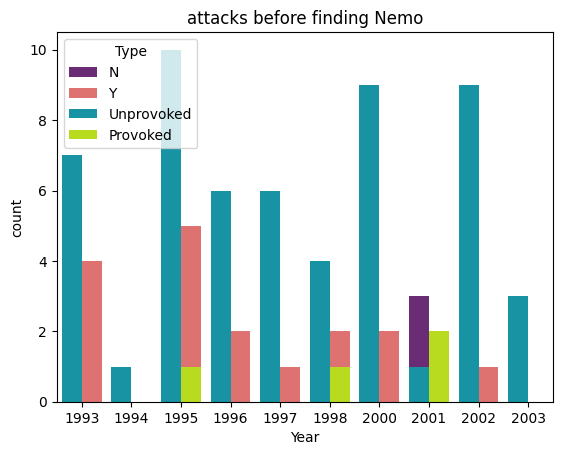

In [344]:
sns.countplot(x=before_finding_nemo["Year"], hue=before_finding_nemo["Fatal"], palette="magma").set(title= "attacks before finding Nemo")
sns.countplot(x=before_finding_nemo["Year"], hue=before_finding_nemo["Type"], palette="nipy_spectral")


<Axes: title={'center': 'attacks after finding Nemo'}, xlabel='Year', ylabel='count'>

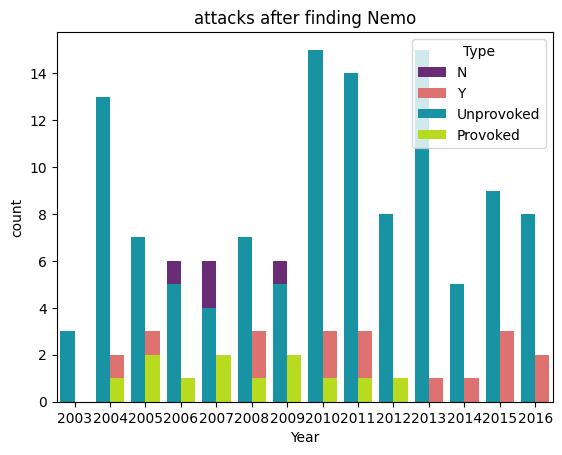

In [345]:
sns.countplot(x=after_finding_nemo["Year"], hue=after_finding_nemo["Fatal"], palette="magma").set(title= "attacks after finding Nemo")
sns.countplot(x=after_finding_nemo["Year"], hue=after_finding_nemo["Type"], palette="nipy_spectral")

<Axes: ylabel='Year'>

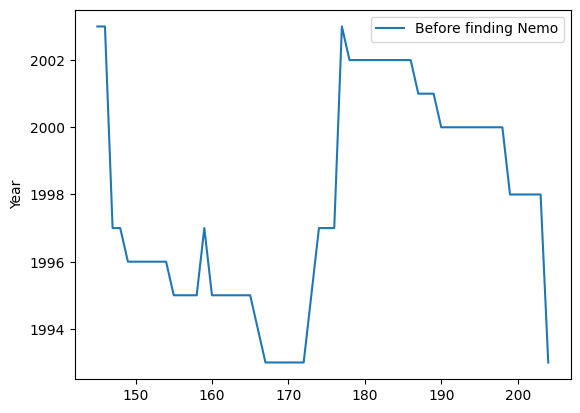

In [365]:
count_before = before_finding_nemo.index.value_counts()
count_after = after_finding_nemo.index.value_counts()
sns.lineplot(x=count_before.index, y=before_finding_nemo["Year"], label="Before finding Nemo")


<Axes: ylabel='Year'>

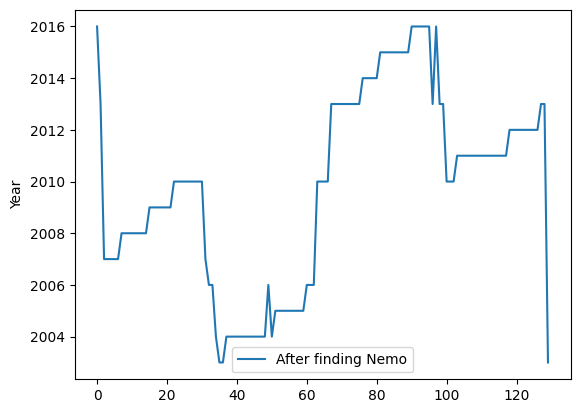

In [366]:
sns.lineplot(x=count_after.index, y=after_finding_nemo["Year"], label="After finding Nemo")